In [15]:
import numpy as np

In [5]:
def sphere(x):
    return (np.sum(np.square(x)))

In [6]:
def elli(x):
    result = 0
    for i in range (0,len(x)):
        result+=(100**((i)/(len(x)-1))*x[i])**2
    return(result)

In [19]:
elli([1,2])

40001.0

In [83]:
def one_one_ES(n,sigma,f,max_iter,x_init ):
#     x = np.random.randint(3,size=n)
    x= x_init
    n_iter=0
    best_value = []
    while(n_iter <max_iter):
        n_iter +=1
        x_ = x + sigma* np.random.multivariate_normal(np.zeros(n),np.identity(n),1)
        x_=x_[0]
#         print(f(x))
        if (f(x_)< f(x)):
            x=x_
        best_value.append(f(x))
    return(best_value)

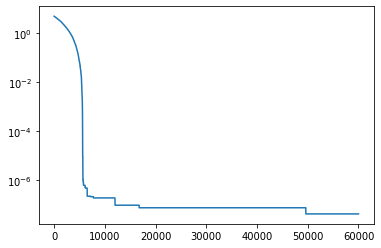

In [68]:
import matplotlib.pyplot as plt
best_values =(one_one_ES(5,1e-3,sphere,60000,np.ones(5)))
plt.semilogy(best_values)

In [108]:
def one_one_ES_adap(n,sigma,f,max_iter,x_init ):
#     x = np.random.randint(3,size=n)
    x= x_init
    n_iter=0
    best_value = []
    sigma_value = [sigma]
    while(n_iter <max_iter):
        n_iter +=1
        x_ = x + sigma* np.random.multivariate_normal(np.zeros(n),np.identity(n),1)
        x_=x_[0]
        if (f(x_)< f(x)):
            x=x_
            sigma = 1.5 * sigma
        else:
            sigma = (1.5)**(-1/4)*sigma
        best_value.append(f(x)**(1/2))
        sigma_value.append(sigma)
    return(best_value ,sigma_value)

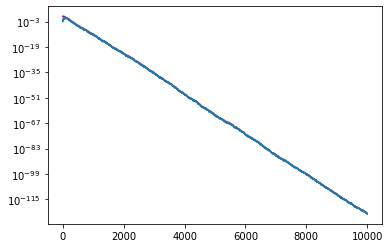

In [113]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,sphere,10000,np.ones(5)))

plt.semilogy(best_values,'r')

plt.semilogy(sigma_values)

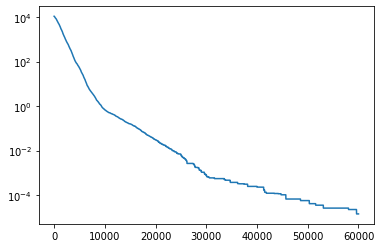

In [70]:
best_values =(one_one_ES(5,1e-3,elli,60000,np.ones(5)))
plt.semilogy(best_values)


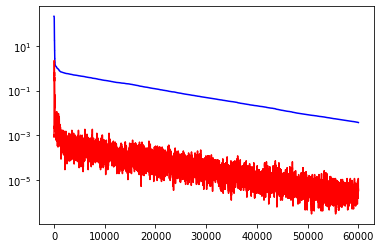

In [114]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,elli,60000,2*np.ones(5)))

plt.semilogy(best_values ,'b')
plt.semilogy(sigma_values ,'r')

In [9]:
def rosenbrock(x):
    return(sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0))

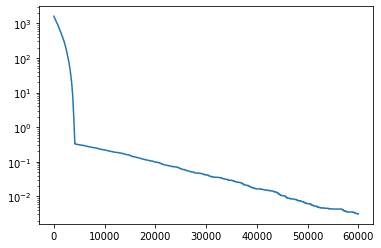

In [117]:
best_values =(one_one_ES(5,1e-3,rosenbrock,60000,2*np.ones(5)))

plt.semilogy(best_values)

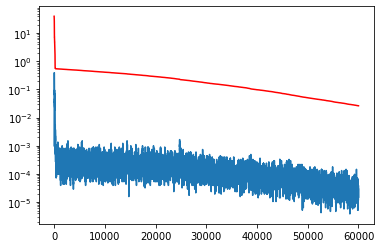

In [121]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,rosenbrock,60000,2*np.ones(5)))

plt.semilogy(best_values,'r')
plt.semilogy(sigma_values)

In [8]:
def g_elli(x):
    return(np.power(elli(x),1/4))

In [7]:
def g_sphere(x):
    return(np.power(sphere(x),1/4))

In [124]:
np.random.seed(1)

In [126]:
def one_one_ES_adap_V2(n,sigma,f,max_iter,x_init,optim ):
#     x = np.random.randint(3,size=n)
    np.random.seed(1)
    x= x_init
    n_iter=0
    best_value = []
    sigma_value = [sigma]
    dist_value =[np.linalg.norm(x-optim)]
    while(n_iter <max_iter):
        n_iter +=1
        x_ = x + sigma* np.random.multivariate_normal(np.zeros(n),np.identity(n),1)
        x_=x_[0]
        if (f(x_)< f(x)):
            x=x_
            sigma = 1.5 * sigma
        else:
            sigma = (1.5)**(-1/4)*sigma
        best_value.append(f(x))
        sigma_value.append(sigma)
        dist_value.append(np.linalg.norm(x-optim))
    return(best_value ,sigma_value,dist_value)

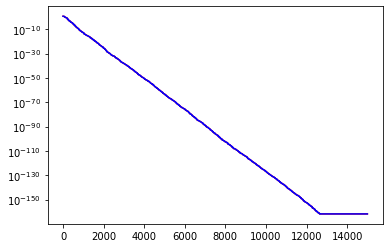

In [127]:

best_values,sigma_values,dist_values_sphere =(one_one_ES_adap_V2(5,1e-3,sphere,15000,2*np.ones(5),np.zeros(5)))
best_values,sigma_values,dist_values_g_sphere =(one_one_ES_adap_V2(5,1e-3,g_sphere,15000,2*np.ones(5),np.zeros(5)))


plt.semilogy(dist_values_sphere, 'r')
plt.semilogy(dist_values_g_sphere, 'b')

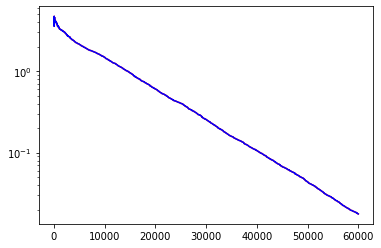

In [128]:
best_values,sigma_values,dist_values_elli =(one_one_ES_adap_V2(5,1e-3,elli,60000,2*np.ones(5),np.zeros(5)))
best_values,sigma_values,dist_values_g_elli =(one_one_ES_adap_V2(5,1e-3,g_elli,60000,2*np.ones(5),np.zeros(5)))

plt.semilogy(dist_values_elli, 'r')

plt.semilogy(dist_values_g_elli, 'b')

In [130]:
!pip install cma

In [1]:
import cma

In [3]:
es = cma.CMAEvolutionStrategy(8 * [0], 0.5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=535170, Wed Jan  8 12:07:43 2020)


In [18]:
es = cma.CMAEvolutionStrategy(5 * [0], 0.5)
es.optimize(elli)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=619541, Wed Jan  8 12:10:54 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 8.797793486434728e+01 1.0e+00 4.43e-01  4e-01  4e-01 0:00.0
    2     16 1.103817320793035e+02 1.2e+00 4.50e-01  4e-01  5e-01 0:00.0
    3     24 3.397149069064141e+02 1.4e+00 4.63e-01  4e-01  5e-01 0:00.0
  100    800 1.075826230429735e-06 8.9e+01 7.96e-04  8e-06  7e-04 0:00.3
  175   1400 7.197357664360480e-15 1.7e+02 7.60e-07  5e-10  8e-08 0:00.4


In [19]:
es.result_pretty()

termination on tolfun=1e-11
final/bestever f-value = 7.197358e-15 7.197358e-15
incumbent solution: [-4.09179928094007e-09, -1.33193193623562e-09, -2.7538470047525954e-09, -1.909939585941762e-09, 2.6397968202845725e-11]
std deviation: [7.98774427906473e-08, 2.4958379342778507e-08, 7.2271411744639165e-09, 2.5845747615784066e-09, 5.015111733064448e-10]


CMAEvolutionStrategyResult(xbest=array([-3.35023676e-08, -1.01749278e-08,  1.19225373e-09, -2.18777027e-09,
       -1.05438038e-10]), fbest=7.19735766436048e-15, evals_best=1400, evaluations=1400, iterations=175, xfavorite=array([-4.09179928e-09, -1.33193194e-09, -2.75384700e-09, -1.90993959e-09,
        2.63979682e-11]), stds=array([7.98774428e-08, 2.49583793e-08, 7.22714117e-09, 2.58457476e-09,
       5.01511173e-10]), stop={'tolfun': 1e-11})

In [20]:
es = cma.CMAEvolutionStrategy(5 * [0], 0.5)
es.optimize(sphere)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=550172, Wed Jan  8 12:10:59 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 5.828144803496751e-01 1.0e+00 4.44e-01  4e-01  4e-01 0:00.0
    2     16 6.358312757096057e-01 1.2e+00 4.16e-01  3e-01  4e-01 0:00.0
    3     24 4.731883187256461e-01 1.4e+00 3.59e-01  3e-01  4e-01 0:00.0
  100    800 6.865422135297592e-13 2.0e+00 1.46e-05  7e-07  1e-06 0:00.2
  121    968 1.993398468113162e-14 1.7e+00 2.78e-06  8e-08  1e-07 0:00.3
